<a href="https://colab.research.google.com/github/MichalMichniak/ML2/blob/main/Lab_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.applications import VGG16

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150, 150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [3]:
conv_base.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [4]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"michaminik","key":"1ec9180ed62fa8d63353dabb02ba24f8"}'}

In [5]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle datasets list

ref                                                  title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
sudarshan24byte/online-food-dataset                  Online Food Dataset                                  3KB  2024-03-02 18:50:30          10450        200  0.9411765        
syedanwarafridi/vehicle-sales-data                   Vehicle Sales Data                                  19MB  2024-02-21 20:16:17          19730        347  1.0              
bhavikjikadara/student-study-performance             Student Study Performance                            9KB  2024-03-07 06:14:09           5774         94  1.0              
julianoorlandi/spotify-top-songs-and-audio-features  Spotify Top Songs and Audio Features               526KB  2024-03-1

In [6]:
! kaggle competitions download -c dogs-vs-cats
! unzip dogs-vs-cats.zip -d dogs-vs-cats
! unzip dogs-vs-cats/train.zip -d dogs-vs-cats/train
!rm -fr cats_vs_dogs
!mkdir cats_vs_dogs
!mkdir cats_vs_dogs/train
!mkdir cats_vs_dogs/validation
!mkdir cats_vs_dogs/test

!mkdir cats_vs_dogs/train/dog
!mkdir cats_vs_dogs/validation/dog
!mkdir cats_vs_dogs/test/dog

!mkdir cats_vs_dogs/train/cat
!mkdir cats_vs_dogs/validation/cat
!mkdir cats_vs_dogs/test/cat
import shutil
for i in range(1000):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/train/dog/dog.{i}.jpg")
for i in range(1000):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/train/cat/cat.{i}.jpg")

for i in range(1000,1500):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/validation/dog/dog.{i}.jpg")
for i in range(1000,1500):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/validation/cat/cat.{i}.jpg")

for i in range(1500,2000):
  shutil.copyfile(f"dogs-vs-cats/train/train/dog.{i}.jpg", f"cats_vs_dogs/test/dog/dog.{i}.jpg")
for i in range(1500,2000):
  shutil.copyfile(f"dogs-vs-cats/train/train/cat.{i}.jpg", f"cats_vs_dogs/test/cat/cat.{i}.jpg")

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
  inflating: dogs-vs-cats/train/train/dog.5499.jpg  
  inflating: dogs-vs-cats/train/train/dog.55.jpg  
  inflating: dogs-vs-cats/train/train/dog.550.jpg  
  inflating: dogs-vs-cats/train/train/dog.5500.jpg  
  inflating: dogs-vs-cats/train/train/dog.5501.jpg  
  inflating: dogs-vs-cats/train/train/dog.5502.jpg  
  inflating: dogs-vs-cats/train/train/dog.5503.jpg  
  inflating: dogs-vs-cats/train/train/dog.5504.jpg  
  inflating: dogs-vs-cats/train/train/dog.5505.jpg  
  inflating: dogs-vs-cats/train/train/dog.5506.jpg  
  inflating: dogs-vs-cats/train/train/dog.5507.jpg  
  inflating: dogs-vs-cats/train/train/dog.5508.jpg  
  inflating: dogs-vs-cats/train/train/dog.5509.jpg  
  inflating: dogs-vs-cats/train/train/dog.551.jpg  
  inflating: dogs-vs-cats/train/train/dog.5510.jpg  
  inflating: dogs-vs-cats/train/train/dog.5511.jpg  
  inflating: dogs-vs-cats/train/train/dog.5512.jpg  
  inflating: dogs-vs-cats/train/train/

In [7]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

base_dir = '/content/cats_vs_dogs'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

In [8]:
def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 4, 4, 512))
    labels = np.zeros(shape=(sample_count))
    generator = datagen.flow_from_directory(
        directory,
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size : (i + 1) * batch_size] = features_batch
        labels[i * batch_size : (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            # Note that since generators yield data indefinitely in a loop,
            # we must `break` after every image has been seen once.
            break
    return features, labels

In [9]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)
test_features, test_labels = extract_features(test_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 51ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 32ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 31ms/step


In [31]:
from keras import layers,models

network = models.Sequential()
network.add(layers.Flatten(input_shape=(4, 4, 512)))
network.add(layers.Dense(256, activation='relu', input_shape=(8192,)))
network.add(layers.Dropout(0.5))
network.add(layers.Dense(1, activation='sigmoid', input_shape=(256,)))

In [32]:
network.compile(optimizer='rmsprop',
                loss='binary_crossentropy',
                metrics=['accuracy'], run_eagerly=True)

In [33]:

network.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (None, 8192)              0         
                                                                 
 dense_14 (Dense)            (None, 256)               2097408   
                                                                 
 dropout_7 (Dropout)         (None, 256)               0         
                                                                 
 dense_15 (Dense)            (None, 1)                 257       
                                                                 
Total params: 2097665 (8.00 MB)
Trainable params: 2097665 (8.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [34]:
history = network.fit(train_features, train_labels, epochs=30, validation_data=(validation_features,validation_labels))

Epoch 1/30
63/63 [==============================] - 5s 31ms/step - loss: 0.7583 - accuracy: 0.7450 - val_loss: 0.2838 - val_accuracy: 0.8820
Epoch 2/30
63/63 [==============================] - 2s 34ms/step - loss: 0.3380 - accuracy: 0.8565 - val_loss: 0.2576 - val_accuracy: 0.8990
Epoch 3/30
63/63 [==============================] - 2s 29ms/step - loss: 0.2831 - accuracy: 0.8760 - val_loss: 0.2705 - val_accuracy: 0.8810
Epoch 4/30
63/63 [==============================] - 2s 34ms/step - loss: 0.2614 - accuracy: 0.8875 - val_loss: 0.2409 - val_accuracy: 0.9000
Epoch 5/30
63/63 [==============================] - 2s 33ms/step - loss: 0.2197 - accuracy: 0.9120 - val_loss: 0.2362 - val_accuracy: 0.9060
Epoch 6/30
63/63 [==============================] - 3s 40ms/step - loss: 0.1787 - accuracy: 0.9300 - val_loss: 0.2814 - val_accuracy: 0.8940
Epoch 7/30
63/63 [==============================] - 2s 33ms/step - loss: 0.1556 - accuracy: 0.9385 - val_loss: 0.3005 - val_accuracy: 0.8870
Epoch 8/30
63

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


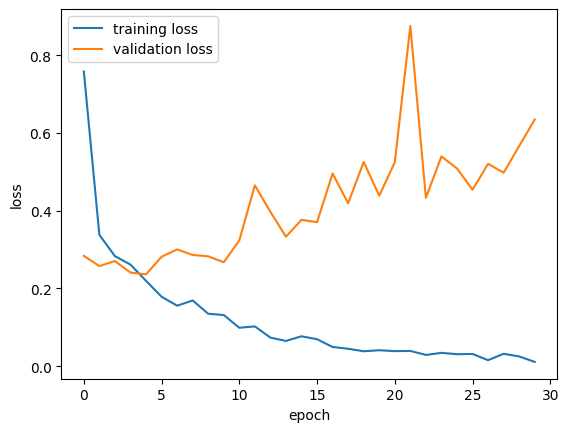

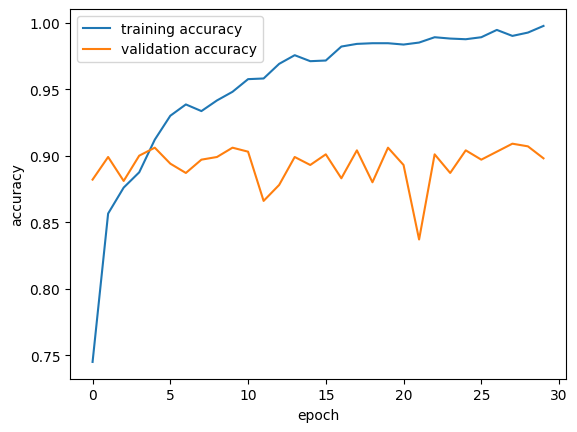

In [35]:
history_dict = history.history
print(history_dict.keys())

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_dict['accuracy'], label = "training accuracy")
plt.plot(history_dict['val_accuracy'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [36]:


model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [37]:
print('This is the number of trainable weights '
      'before freezing the conv base:', len(model.trainable_weights))

conv_base.trainable = False

print('This is the number of trainable weights '
      'after freezing the conv base:', len(model.trainable_weights))


This is the number of trainable weights before freezing the conv base: 30
This is the number of trainable weights after freezing the conv base: 4


In [40]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        # All images will be resized to 150x150
        target_size=(150, 150),
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])

history = model.fit(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


Epoch 1/30
100/100 - 21s - loss: 0.6983 - acc: 0.7050 - val_loss: 0.3209 - val_acc: 0.8520 - 21s/epoch - 210ms/step
Epoch 2/30
100/100 - 19s - loss: 0.4801 - acc: 0.7750 - val_loss: 0.4776 - val_acc: 0.7850 - 19s/epoch - 191ms/step
Epoch 3/30
100/100 - 17s - loss: 0.4149 - acc: 0.8095 - val_loss: 0.2711 - val_acc: 0.8830 - 17s/epoch - 173ms/step
Epoch 4/30
100/100 - 18s - loss: 0.3874 - acc: 0.8165 - val_loss: 0.2722 - val_acc: 0.8900 - 18s/epoch - 177ms/step
Epoch 5/30
100/100 - 17s - loss: 0.3755 - acc: 0.8315 - val_loss: 0.2576 - val_acc: 0.8960 - 17s/epoch - 172ms/step
Epoch 6/30
100/100 - 20s - loss: 0.3721 - acc: 0.8250 - val_loss: 0.2478 - val_acc: 0.9060 - 20s/epoch - 202ms/step
Epoch 7/30
100/100 - 18s - loss: 0.3408 - acc: 0.8505 - val_loss: 0.2410 - val_acc: 0.9000 - 18s/epoch - 176ms/step
Epoch 8/30
100/100 - 17s - loss: 0.3220 - acc: 0.8525 - val_loss: 0.2727 - val_acc: 0.8780 - 17s/epoch - 173ms/step
Epoch 9/30
100/100 - 17s - loss: 0.3481 - acc: 0.8440 - val_loss: 0.2435

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])


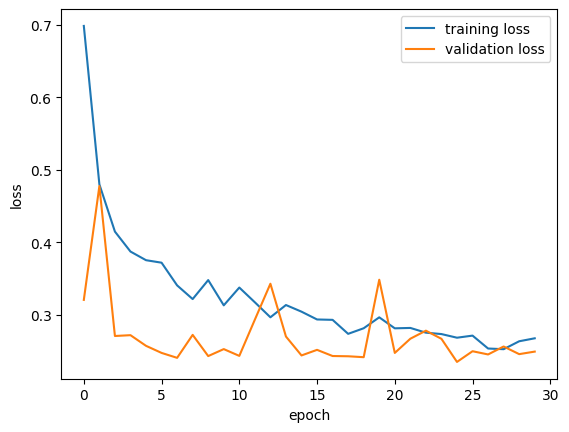

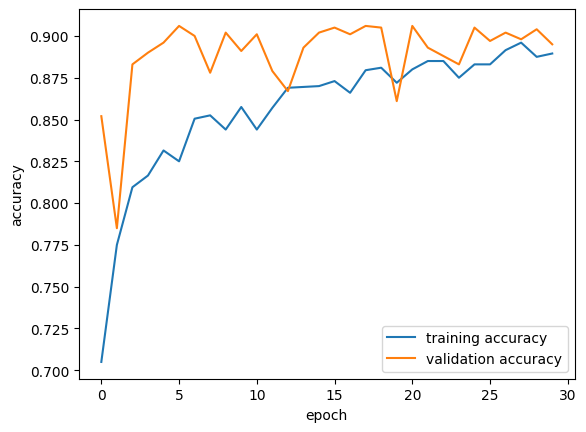

In [42]:
history_dict = history.history
print(history_dict.keys())

import matplotlib.pyplot as plt

plt.plot(history_dict['loss'], label = "training loss")
plt.plot(history_dict['val_loss'], label = "validation loss")
plt.xlabel("epoch")
plt.ylabel("loss")
plt.legend()
plt.show()

plt.plot(history_dict['acc'], label = "training accuracy")
plt.plot(history_dict['val_acc'], label = "validation accuracy")
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.legend()
plt.show()

In [43]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [44]:
conv_base.trainable = True

set_trainable = False
for layer in conv_base.layers:
    if (layer.name == 'block5_conv1') or (layer.name == 'block5_conv2') or (layer.name == 'block5_conv3'):
        set_trainable = True
    if set_trainable:
        layer.trainable = True
    else:
        layer.trainable = False

In [45]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/100


<ipython-input-45-8d10d24b3a0c>:5: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


100/100 [==============================] - 23s 206ms/step - loss: 8.8554 - acc: 0.5055 - val_loss: 0.6943 - val_acc: 0.5000
Epoch 2/100
100/100 [==============================] - 19s 193ms/step - loss: 0.7394 - acc: 0.5770 - val_loss: 0.5050 - val_acc: 0.7440
Epoch 3/100
100/100 [==============================] - 20s 198ms/step - loss: 0.6165 - acc: 0.7275 - val_loss: 0.5340 - val_acc: 0.6770
Epoch 4/100
100/100 [==============================] - 19s 188ms/step - loss: 0.4357 - acc: 0.8290 - val_loss: 0.2406 - val_acc: 0.9060
Epoch 5/100
100/100 [==============================] - 19s 189ms/step - loss: 0.3891 - acc: 0.8590 - val_loss: 0.3736 - val_acc: 0.8870
Epoch 6/100
100/100 [==============================] - 19s 186ms/step - loss: 0.3113 - acc: 0.8770 - val_loss: 0.3030 - val_acc: 0.9190
Epoch 7/100
100/100 [==============================] - 18s 184ms/step - loss: 0.3298 - acc: 0.8680 - val_loss: 0.3008 - val_acc: 0.9090
Epoch 8/100
100/100 [==============================] - 20s 1

KeyboardInterrupt: 